
# Trabajo Práctico 2

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [2]:
my_cols = pd.read_csv('./data/pokemon/columns.csv').column.values.tolist()

df = pd.read_csv('./data/pokemon/pokemon.csv',
                       delimiter=',',
                       header=0,                       
                    )

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [3]:
print("Estructura features del dataset: {}".format(df.shape))

Estructura features del dataset: (801, 41)


In [4]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [5]:
df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [7]:
df.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

## Preprocessing

In [8]:
df.describe(include='O')

,abilities,capture_rate,classfication,japanese_name,name,type1,type2
count,801,801,801,801,801,801,417
unique,482,34,588,801,801,18,18
top,['Levitate'],45,Dragon Pokémon,Fushigidaneフシギダネ,Bulbasaur,water,flying
freq,29,250,8,1,1,114,95


In [9]:
pd.set_option('display.max_columns', None)
df.loc[pd.to_numeric(df['capture_rate'], errors='coerce').isna()]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
773,['Shields Down'],0.5,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0,0.5,0.5,1.0,2.0,2.0,2.0,100,6400,70,500,30 (Meteorite)255 (Core),Meteor Pokémon,60,1059860,0.3,60,Metenoメテノ,Minior,NaN,774,100,60,120,rock,flying,40.0,7,0


La columna capture_rate debería ser solo numérico. Se busca la o las filas con problemas y se eliminarán

In [10]:
df = df.drop(index=773)

In [13]:
df = df.astype({'capture_rate':'int64'})
df.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate           int64
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

### Estandarización

In [14]:

# dejamos al Label cómo tipo distinto, pero numérico, para separar después por tipos
df = df.astype({'is_legendary': 'int32'})

In [15]:
#colsNumericas = ['height_m', 'percentage_male', 'weight_kg']
#colsObject = ['type2']
colsNumericas = df.select_dtypes(['float64', 'int64']).columns
colsObject = df.select_dtypes(['object']).columns

In [17]:
# Estandarizamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[colsNumericas])

df2 = df.copy(deep=True)
df2[colsNumericas] = X_scaled



### Missing

In [18]:
#Identificar columnas con valores NaN
colsNa = pd.DataFrame(data=df.isna().sum()>0, columns=['Valor'])
mask = colsNa.loc[colsNa['Valor']].index
df[mask]

,height_m,percentage_male,type2,weight_kg
0,0.7,88.1,poison,6.9
1,1.0,88.1,poison,13.0
2,2.0,88.1,poison,100.0
3,0.6,88.1,NaN,8.5
4,1.1,88.1,NaN,19.0
...,...,...,...,...
796,9.2,NaN,flying,999.9
797,0.3,NaN,steel,0.1
798,5.5,NaN,dragon,888.0
799,2.4,NaN,NaN,230.0


In [19]:
# Completar valores NaN

valueNum=df2[colsNumericas].values
valueObj=df2[colsObject].values

impNum = SimpleImputer(missing_values=np.nan, strategy='mean')
impObject = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

transformed_valuesNum = impNum.fit_transform(valueNum)
transformed_valuesObj = impObject.fit_transform(valueObj)

df3 = df2.copy(deep=True)

df3[colsNumericas] = transformed_valuesNum
df3[colsObject] = transformed_valuesObj

print(df.isna().sum().sum())
print(df2.isna().sum().sum())
print(df3.isna().sum().sum())


521
521
0


In [20]:
df3.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,800.000000
mean,2.089995e-16,1.823541e-16,-1.409983e-16,3.637715e-16,-8.504308e-16,1.857021e-16,-7.605028e-17,-3.336220e-16,9.387022e-17,-1.397493e-16,4.718448e-17,-9.089951e-17,1.411093e-15,-1.598721e-16,5.739853e-16,2.051137e-16,-3.519927e-16,9.707513e-17,6.135370e-16,-3.008704e-16,-8.104628e-17,-2.847722e-16,-1.842970e-16,-2.453593e-16,5.939693e-17,-2.126771e-17,3.004541e-17,1.015102e-16,-1.665335e-17,2.126077e-16,8.631984e-17,6.390721e-17,2.754741e-17,-1.621481e-15,0.087500
std,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,9.880386e-01,1.000626e+00,9.380031e-01,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,9.880386e-01,1.000626e+00,0.282743
min,-1.251069e+00,-1.842318e+00,-2.743900e+00,-1.640031e+00,-1.568601e+00,-1.485715e+00,-1.281658e+00,-1.562524e+00,-1.764423e+00,-9.938743e-01,-1.490079e+00,-1.302611e+00,-3.339559e+00,-1.777283e+00,-2.030184e+00,-1.434557e+00,-1.467833e+00,-1.332770e+00,-2.265370e+00,-9.014723e-01,-3.334798e+00,-2.083357e+00,-1.256542e+00,-2.211065e+00,-2.839148e+00,-9.862182e-01,-2.557751e+00,-2.724117e+00,-1.729610e+00,-1.894681e+00,-1.822666e+00,-2.124007e+00,-5.606250e-01,-1.394103e+00,0.000000
25%,-8.323010e-01,-1.305243e-01,8.851291e-02,-8.756703e-01,-1.322628e-01,-7.886055e-01,-9.201181e-01,-3.207831e-01,2.686938e-02,-6.769754e-01,-1.346917e-01,-9.623924e-01,4.233244e-01,-8.667311e-01,-1.072836e-02,-3.579665e-01,-9.666525e-01,-9.199879e-01,-7.101248e-01,-3.159422e-01,2.369470e-01,-9.086302e-01,-7.054343e-01,-7.483980e-01,-3.431379e-01,-5.232049e-01,-7.138523e-01,-2.546406e-01,-8.648779e-01,-8.123596e-01,-7.489307e-01,-7.372964e-01,-4.767217e-01,-8.751259e-01,0.000000
50%,5.234598e-03,-1.305243e-01,8.851291e-02,-1.113100e-01,-1.322628e-01,-9.149567e-02,-1.970390e-01,-3.207831e-01,2.686938e-02,-4.317748e-02,-1.346917e-01,-2.819559e-01,4.233244e-01,4.382029e-02,-1.072836e-02,-3.579665e-01,3.570913e-02,-9.442389e-02,-8.802686e-02,-3.159422e-01,2.369470e-01,5.632396e-02,-5.086101e-01,-9.832373e-02,-3.431379e-01,-1.527944e-01,-1.493934e-01,-2.546406e-01,-1.461061e-04,-1.938902e-01,-1.762716e-01,-4.394138e-02,-3.013707e-01,1.628292e-01,0.000000
75%,5.234598e-03,-1.305243e-01,8.851291e-02,-1.113100e-01,-1.322628e-01,-9.149567e-02,1.249119e+00,-3.207831e-01,2.686938e-02,-4.317748e-02,-1.346917e-01,1.078917e+00,4.233244e-01,4.382029e-02,-1.072836e-02,1.077488e+00,3.570913e-02,-9.442389e-02,6.895956e-01,-2.671481e-01,2.369470e-01,6.436874e-01,9.347672e-01,5.517505e-01,3.039002e-02,3.102189e-01,4.150654e-01,-8.843882e-17,8.645857e-01,6.101201e-01,6.827170e-01,6.494137e-01,2.007160e-03,6.818068e-01,0.000000
max,5.030448e+00,6.716650e+00,2.920926e+00,4.474852e+00,5.613090e+00,4.091163e+00,4.141435e+00,4.646181e+00,5.400746e+00,3.759610e+00,3.931471e+00,3.800663e+00,4.233244e-01,5.507129e+00,6.047639e+00,3.948397e+00,6.049879e+00,4.858960e+00,3.333512e

In [21]:
df3.describe(include='O')

,abilities,classfication,japanese_name,name,type1,type2
count,800,800,800,800,800,800
unique,481,587,800,800,18,18
top,['Levitate'],Dragon Pokémon,Fushigidaneフシギダネ,Bulbasaur,water,flying
freq,29,8,1,1,114,478


In [24]:
df3.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",0.005235,-0.130524,0.088513,-0.87567,-1.089822,-0.788606,1.249119,1.334872,0.026869,-0.993874,-0.134692,1.078917,0.423324,0.04382,2.008727,-0.357966,0.035709,-0.919988,-0.896754,-0.315942,0.236947,-0.925412,-0.705434,Seed Pokémon,-0.780902,0.03039,-0.430602,-0.902005,Fushigidaneフシギダネ,Bulbasaur,1.6271,-1.729610,-0.193890,-0.212063,-0.737296,grass,poison,-0.498441,-1.394103,0
1,"['Overgrow', 'Chlorophyll']",0.005235,-0.130524,0.088513,-0.87567,-1.089822,-0.788606,1.249119,1.334872,0.026869,-0.993874,-0.134692,1.078917,0.423324,0.04382,2.008727,-0.357966,0.035709,-0.919988,-0.492391,-0.315942,0.236947,-0.195403,-0.705434,Seed Pokémon,-0.325850,0.03039,-0.152794,-0.337546,Fushigisouフシギソウ,Ivysaur,1.6271,-1.725281,0.269962,0.324805,-0.217280,grass,poison,-0.442657,-1.394103,0
2,"['Overgrow', 'Chlorophyll']",0.005235,-0.130524,0.088513,-0.87567,-1.089822,-0.788606,1.249119,1.334872,0.026869,-0.993874,-0.134692,1.078917,0.423324,0.04382,2.008727,-0.357966,0.035709,-0.919988,0.689596,-0.315942,0.236947,1.650596,-0.705434,Seed Pokémon,1.624373,0.03039,0.773232,0.415065,Fushigibanaフシギバナ,Venusaur,1.6271,-1.720952,1.568748,1.756453,0.476075,grass,poison,0.352938,-1.394103,0
3,"['Blaze', 'Solar Power']",-0.832301,-0.130524,0.088513,-0.11131,-1.089822,-0.091496,-0.920118,-0.320783,0.026869,-0.676975,1.220696,-0.962392,0.423324,0.04382,-0.010728,1.077488,-0.966653,1.556704,-0.803439,-0.315942,0.236947,-1.000930,-0.705434,Lizard Pokémon,-0.975924,0.03039,-0.523205,-1.127789,Hitokageヒトカゲ,Charmander,1.6271,-1.716623,-0.348508,-0.748931,-0.043941,fire,flying,-0.483809,-1.394103,0
4,"['Blaze', 'Solar Power']",-0.832301,-0.130524,0.088513,-0.11131,-1.089822,-0.091496,-0.920118,-0.320783,0.026869,-0.676975,1.220696,-0.962392,0.423324,0.04382,-0.010728,1.077488,-0.966653,1.556704,-0.430181,-0.315942,0.236947,-0.195403,-0.705434,Flame Pokémon,-0.488368,0.03039,-0.060192,-0.412808,Lizardoリザード,Charmeleon,1.6271,-1.712293,0.269962,-0.212063,0.476075,fire,flying,-0.387789,-1.394103,0


In [25]:
#split

from sklearn.model_selection import train_test_split



label = 'is_legendary'
df3[label] = df3[label] * 1
features = df3.loc[:, df3.columns != label].columns
# dejamos solo las numéricas
features = df3[colsNumericas].columns

X = df3[features]
y = df3[label]
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_val, y_val, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=57)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(536, 34)
(264, 34)
(88, 34)
(536,)
(264,)
(88,)


# PCA


In [31]:
pca = PCA(n_components=0.9, random_state=26).fit(X_train)
X_pca = pca.transform(X_train)

In [32]:
X_pca.shape

(536, 19)

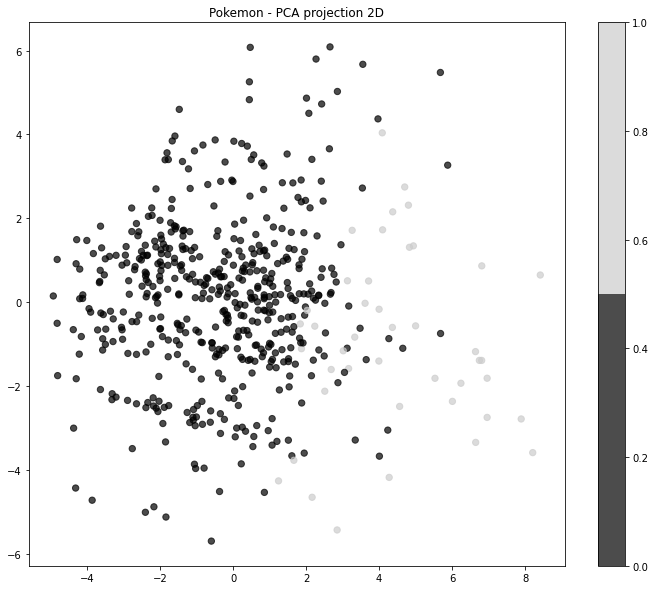

In [34]:
# Graficamos los primeros dos componentes
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.rcParams['axes.grid'] = False #Evita un warning
plt.colorbar()
plt.title('Pokemon - PCA projection 2D');

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [35]:
from sklearn.linear_model import ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV, SGDClassifier, SGDRegressor

In [38]:

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)


LogisticRegression()

In [53]:
predictions = logistic_regression.predict(X_test)

predictions2 = logistic_regression.predict(X_val)

In [61]:
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

Performance vs Test

In [59]:
precision_score(y_test, predictions)

0.9259259259259259

In [62]:
# 
confusion_matrix(y_test, predictions)

array([[235,   2],
       [  2,  25]], dtype=int64)

Performance vs validation

In [64]:
precision_score(y_val, predictions2)

0.9166666666666666

In [65]:
# 
confusion_matrix(y_val, predictions2)

array([[75,  1],
       [ 1, 11]], dtype=int64)

## La regresión Logística con los features seleccionados arroja muy buenos resultados tanto en el score como en la matriz de confusión